In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv('dataset\ResumeDataset.csv')
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


#Transformations

In [7]:
data.shape

(962, 2)

In [8]:
data['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

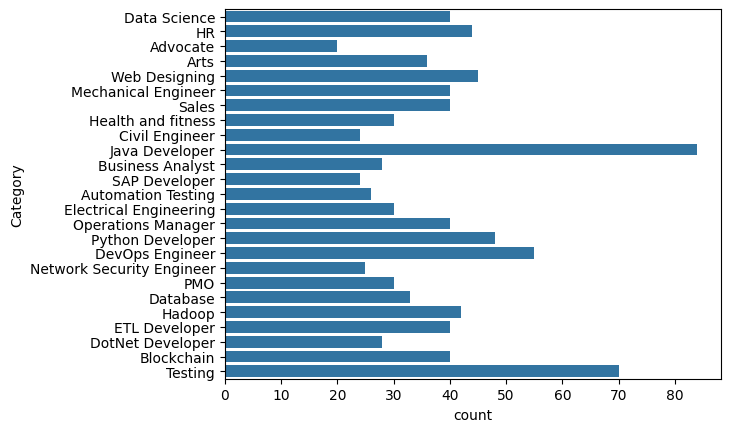

In [9]:
# visualizayion

sns.countplot(data['Category'])


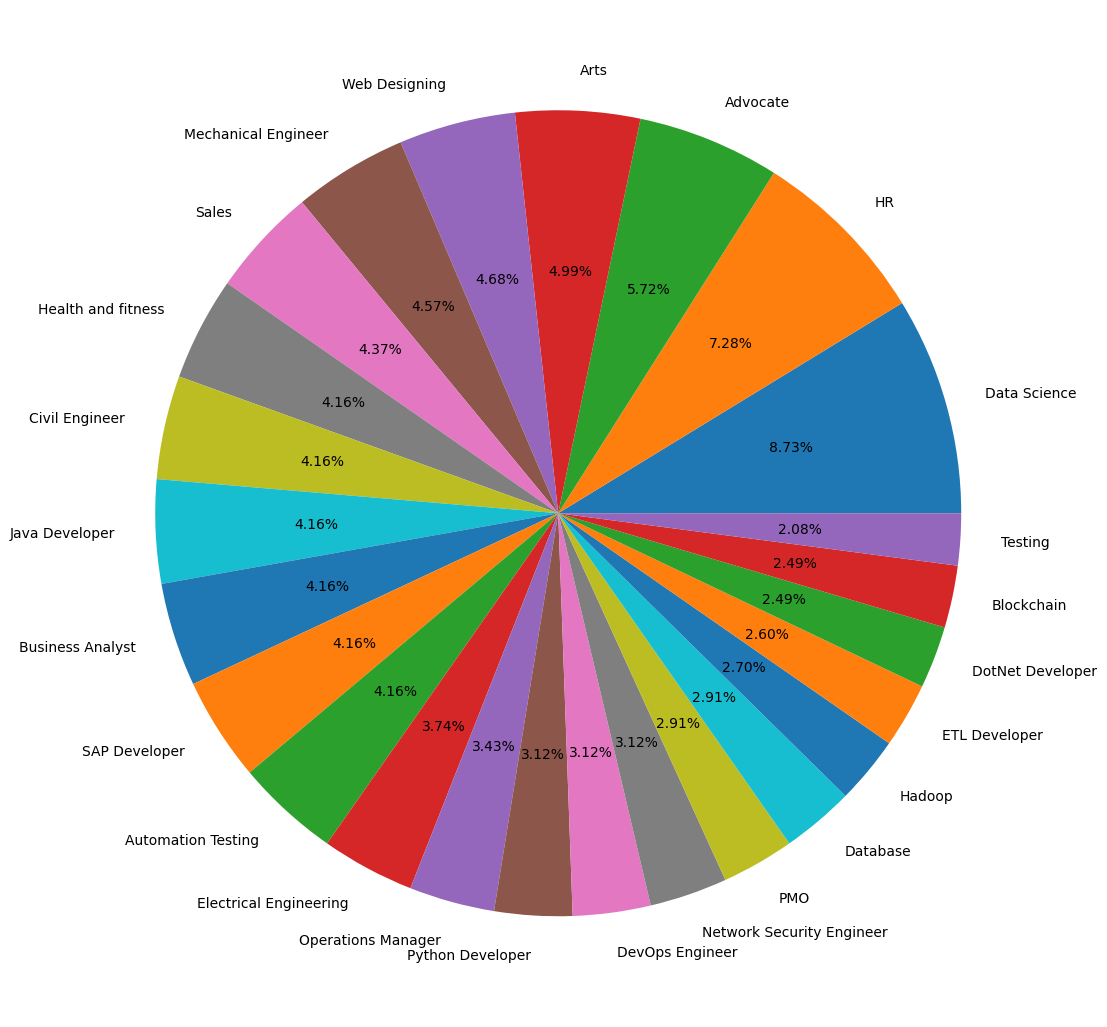

In [10]:
count=data['Category'].value_counts()
label=data['Category'].unique()
plt.figure(figsize=(13,18))
plt.pie(count,labels=label,autopct='%1.2f%%')
plt.show()

In [11]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [12]:
data['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [13]:
data['Resume'][3]

"Skills â\x80¢ R â\x80¢ Python â\x80¢ SAP HANA â\x80¢ Tableau â\x80¢ SAP HANA SQL â\x80¢ SAP HANA PAL â\x80¢ MS SQL â\x80¢ SAP Lumira â\x80¢ C# â\x80¢ Linear Programming â\x80¢ Data Modelling â\x80¢ Advance Analytics â\x80¢ SCM Analytics â\x80¢ Retail Analytics â\x80¢Social Media Analytics â\x80¢ NLP Education Details \r\nJanuary 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology\r\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University\r\nData Science Consultant \r\n\r\nConsultant - Deloitte USI\r\nSkill Details \r\nLINEAR PROGRAMMING- Exprience - 6 months\r\nRETAIL- Exprience - 6 months\r\nRETAIL MARKETING- Exprience - 6 months\r\nSCM- Exprience - 6 months\r\nSQL- Exprience - Less than 1 year months\r\nDeep Learning- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year mo

# Data Cleaning
##### urls
##### hashtags
##### mentions
##### special letters
##### punctuation

In [14]:
import re

def cleanResume(txt):
    cleantxt = re.sub('https\S+\s', " ", txt)  # remove hhtps
    cleantxt = re.sub('@\S+', " ", cleantxt)   # remove @
    cleantxt = re.sub('#\S+', " ", cleantxt)   # remove #
    cleantxt = re.sub('RT|cc', " ", cleantxt)  # remove rt, cc
    cleantxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), " ", cleantxt) # all punctuation & special chara
    cleantxt = re.sub('\s+', " ", cleantxt) # remove multiple space with single space
    cleantxt = re.sub('\n', " ", cleantxt)   # remove newline
    cleantxt = re.sub(r'[^\x00-\x7f]', " ", cleantxt)  # remove ASCII

    return cleantxt


In [15]:
data['Resume']=data['Resume'].apply(lambda x:cleanResume(x))

In [16]:
data['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills     R     Python     SAP HANA     Table...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills     Proficient in MS office Wo...
958        Willingness to a ept the challenges     Po...
959    PERSONAL SKILLS     Quick learner     Eagernes...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

# word to number

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['Category'])

LabelEncoder()

In [18]:
data['Category']=le.transform(data['Category'])

In [19]:
data['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Vectorization

In [20]:
# resume column

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf.fit(data['Resume'])

TfidfVectorizer()

In [21]:
required=tf.transform(data['Resume'])

# train test split

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(required,data['Category'],test_size=0.2,random_state=42)

In [23]:
x_test.shape , x_train.shape

((193, 7569), (769, 7569))

# Model selection

In [38]:
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the classifiers to evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "Naive Bayes": MultinomialNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

# Initialize a list to store results
results = []
best_accuracy = 0
best_model = None
best_model_name = None

# Get the number of features
n_features = x_train.shape[1]
# Create generic feature names if they're not available
feature_names = [f'feature_{i}' for i in range(n_features)]

# Loop through each classifier, train it, and evaluate it
for name, clf in classifiers.items():
    print(f"Training and evaluating: {name}")

    # Train the model
    clf.fit(x_train, y_train)

    # Make predictions
    y_pred = clf.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extract metrics for the positive class (assumed to be '1')
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']

    # Keep track of the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = clf
        best_model_name = name

    # Append results to the list
    results.append({
        "Classifier": name,
        "Accuracy": accuracy*100,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score
    })

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Sort the table by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Display the results table
print("\nClassification Results:")
print(results_df)

# Save the best model to a pickle file
print(f"\nSaving the best model: {best_model_name}")
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

# Save the TF-IDF vectorizer
print("Saving the TF-IDF vectorizer")
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tf, file)  # 'tf' is your TfidfVectorizer instance

# Save the label encoder
print("Saving the label encoder")
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)  # 'le' is your LabelEncoder instance

# Save the model info
model_info = {
    'model_name': best_model_name,
    'accuracy': best_accuracy,
    'feature_names': feature_names,
    'n_features': n_features
}

with open('model_info.pkl', 'wb') as file:
    pickle.dump(model_info, file)

print(f"\nAll components saved successfully!")
print(f"Number of features: {n_features}")
print(f"Components saved: best_model.pkl, tfidf_vectorizer.pkl, label_encoder.pkl, model_info.pkl")

Training and evaluating: Logistic Regression
Training and evaluating: Decision Tree
Training and evaluating: Random Forest
Training and evaluating: Gradient Boosting
Training and evaluating: Support Vector Classifier
Training and evaluating: Naive Bayes
Training and evaluating: K-Nearest Neighbors

Classification Results:
                  Classifier    Accuracy  Precision  Recall  F1-Score
3          Gradient Boosting  100.000000        1.0     1.0       1.0
1              Decision Tree   99.481865        1.0     1.0       1.0
0        Logistic Regression   99.481865        1.0     1.0       1.0
4  Support Vector Classifier   99.481865        1.0     1.0       1.0
2              Random Forest   98.445596        1.0     1.0       1.0
6        K-Nearest Neighbors   98.445596        1.0     1.0       1.0
5                Naive Bayes   93.264249        1.0     1.0       1.0

Saving the best model: Gradient Boosting
Saving the TF-IDF vectorizer
Saving the label encoder

All components save

# prediction

In [39]:
def pred(input):
    try:
        # Debug print for input
        print("Original Input:", input)
        
        # Preprocess the input
        cleanedText = cleanResume(input)
        print("Cleaned Text:", cleanedText)
        
        # Vectorize the input
        vectorizeText = tf.transform([cleanedText])
        print("Vectorized Shape:", vectorizeText.shape)
        
        # Convert sparse matrix to dense vector
        vectorizeText = vectorizeText.toarray()
        print("Dense Array Shape:", vectorizeText.shape)
        
        # Make prediction
        prediction = best_model.predict(vectorizeText)
        print("Raw Prediction:", prediction)
        
        # Transform prediction back to category
        predicted_category = le.inverse_transform(prediction)
        print("Transformed Prediction:", predicted_category)
        
        # Get name of the category
        predicted_category_name = predicted_category[0]
        print("Final Category Name:", predicted_category_name)
        
        return predicted_category_name
        
    except Exception as e:
        print(f"Error in prediction: {str(e)}")
        print(f"Error type: {type(e)}")
        return f"Prediction Error: {str(e)}"



In [40]:
# Test the function
test_input = """
Experience
Intern | PTCL
Engaging in an internship role at PTCL Pakistan, I have cultivated a profound understanding of networking intricacies, protocols, and meticulous power checking procedures. This experience has equipped me with the skills to ensure the seamless operation of telecommunications systems while fostering a comprehensive knowledge of network optimization and power efficiency practices.
Aug 2023-Sep 2023
Education
Government College University Lahore
BSc (Hons) Electronics
Completed in 2023 CGPA 3.63
Government College for Women Gulberg, Lahore 
Fsc Pre-Engineering
Completed in 2019 900/1100
Presidential initiative for Artificial intelligence and computing (PIAIC)
Certified cloud Generative AI Engineer
bismashafiq26@gmail.com
Bisma Shafiq
+92 3250445584
LinkedIn
Analytics Associate |Source Kode Solutions
Developed and implemented strategies to enhance digital presence and engagement.
 Conducted data analysis  to derive actionable insights for marketing and sales departments.
Created detailed visual reports and dashboards using Power BI and Tableau to communicate findings effectively.
Monitored and measured campaign performance to optimize marketing efforts and ROI.
April -present
Collected data from various sources and updated data on the company's websites.
Managed the company's Amazon and Shopify accounts using Excel for inventory management and sales processing.
Created monthly sales dashboards for the sales department using Power BI.
Data Analyst | Digital Mindset
Oct 23-March 24
BCG's Data Science job simulation on the Forage platform.
I worked on a project to create a customer churn analysis simulation using Python. This project built my data science skills in a real-world context, as well as my presentation skills through creating an executive summary of my findings for the team.
Data Scientist  | BCG X
Nov24-2nd Dec 24
Skills and Abilities
Programming: Python, R, MATLAB
Machine Learning: TensorFlow, PyTorch, Scikit-learn
Generative AI: Langchain , LlamaIndex , CrewAI , Langraph
Data Analysis: SQL, Excel, Power BI, Tableau
Backend: Flask, FastAPI
Data Visualization: Matplotlib, Seaborn, Looker Studio
Computer Vision Libraries: OpenCV, CvZone
Containerization: Docker
Big Data Technology: PySpark, Databrick
Other Skills: Statistical Modeling, Neural Networks, Trello, Clikup
Projects
End-to-End ML | MLflow | DVC-pipeline
Built an end-to-end ML pipeline for water quality prediction using Random Forest, achieving 98% accuracy, with optimized data preprocessing, feature engineering, and hyperparameter tuning.
Integrated MLflow for model tracking and performance evaluation, and DVC for data versioning, ensuring reproducibility of datasets and model artifacts.
Orchestrated the workflow using DagsHub for collaborative development and automated the pipeline for streamlined deployment in a production-ready environment.
GenAI - ChatBot - Gemini API
Developed a Streamlit AI app for interacting Comapny documents using Google Generative AI (Gemini) and FAISS-based similarity search. Integrated LangChain for a conversational Q&A system, enabling context-aware responses. Implemented document processing workflows, including text extraction, chunking, embedding, and indexing for efficient document-based queries.
Hand Gesture Recognition
Developed a computer vision system using OpenCV and TensorFlow to classify hand gestures in real-time with 95% accuracy.
Enables touchless interactions for applications like gaming, virtual reality, and accessibility tools.
Practice Project
GenAI PDF Converstion and Image Generation App
Employee Attribution Machine Leaning Project
AI Game
Certificates and Badges
Python for DS/ML  from Great Learning
Python for AI from Deeplearning.AI
Data Analysis and Bussiness Intelligence from DigiSkill Pakistan
Data Analysis Badges Using Python from Microsoft
Microsoft Fabric from Microsoft
Apache PySpark from Great Learning
MLOps Badge from Google
Position of Responsibility
Head of Robotronics at Government College University , a robotics workshop
Junior Data scientist at BCG X , a virtual program
AI Engineer
Portfolio
"""  

result = pred(test_input)
print("\nFinal Result:", result)

Original Input: 
Experience
Intern | PTCL
Engaging in an internship role at PTCL Pakistan, I have cultivated a profound understanding of networking intricacies, protocols, and meticulous power checking procedures. This experience has equipped me with the skills to ensure the seamless operation of telecommunications systems while fostering a comprehensive knowledge of network optimization and power efficiency practices.
Aug 2023-Sep 2023
Education
Government College University Lahore
BSc (Hons) Electronics
Completed in 2023 CGPA 3.63
Government College for Women Gulberg, Lahore 
Fsc Pre-Engineering
Completed in 2019 900/1100
Presidential initiative for Artificial intelligence and computing (PIAIC)
Certified cloud Generative AI Engineer
bismashafiq26@gmail.com
Bisma Shafiq
+92 3250445584
LinkedIn
Analytics Associate |Source Kode Solutions
Developed and implemented strategies to enhance digital presence and engagement.
 Conducted data analysis  to derive actionable insights for marketing 